In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

# Параметры системы масса-пружина
m = 1.0        # масса (кг)
k = 10.0       # жесткость пружины (Н/м)
c = 0.5        # коэффициент демпфирования (Н⋅с/м)
x0 = 1.0       # начальное смещение (м)
v0 = 0.0       # начальная скорость (м/с)

# Производные параметры (упрощенные обозначения)
omega = np.sqrt(k/m)  # собственная частота
gamma = c / (2 * m)   # коэффициент затухания
beta = np.sqrt(omega**2 - gamma**2)  # частота затухающих колебаний


In [6]:
# АНАЛИТИЧЕСКОЕ решение для системы БЕЗ демпфирования
A = x0  # амплитуда (при v0=0)
phi = 0  # начальная фаза (при v0=0)

x_analytical_undamped = A * np.cos(omega * t_eval + phi)
v_analytical_undamped = -A * omega * np.sin(omega * t_eval + phi)


NameError: name 't_eval' is not defined

In [ ]:
# Численное решение - система БЕЗ демпфирования
def system_undamped(t, state):
    x, v = state
    dxdt = v
    dvdt = -(k/m) * x
    return [dxdt, dvdt]

# Время интегрирования
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Численное решение методом RK45
sol_undamped = solve_ivp(
    system_undamped, 
    t_span, 
    [x0, v0], 
    t_eval=t_eval, 
    method='RK45',
    rtol=1e-10
)

x_num_undamped = sol_undamped.y[0]
v_num_undamped = sol_undamped.y[1]

$$\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\frac{k}{m}x
\end{cases}$$


In [ ]:
# Численное решение - система С демпфированием
def system_damped(t, state):
    x, v = state
    dxdt = v
    dvdt = -(k/m) * x - (c/m) * v
    return [dxdt, dvdt]

# Численное решение методом RK45
sol_damped = solve_ivp(
    system_damped, 
    t_span, 
    [x0, v0], 
    t_eval=t_eval, 
    method='RK45',
    rtol=1e-10
)

x_num_damped = sol_damped.y[0]
v_num_damped = sol_damped.y[1]

$$\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\frac{k}{m}x - \frac{c}{m}v
\end{cases}$$


In [ ]:
# АНАЛИТИЧЕСКОЕ решение для системы БЕЗ демпфирования
A = x0  # амплитуда (при v0=0)
phi = 0  # начальная фаза (при v0=0)

x_analytical_undamped = A * np.cos(omega_n * t_eval + phi)
v_analytical_undamped = -A * omega_n * np.sin(omega_n * t_eval + phi)

$$\begin{cases}
x(t) = A\cos(\omega_n t + \phi) \\
v(t) = -A\omega_n\sin(\omega_n t + \phi)
\end{cases}$$


In [ ]:
# АНАЛИТИЧЕСКОЕ решение для системы С демпфированием (недодемпфированный случай)

A_damped = np.sqrt(x0**2 + ((v0 + zeta*omega_n*x0)/omega_d)**2)
phi_damped = np.arctan2((v0 + zeta*omega_n*x0)/(omega_d*x0), 1)

x_analytical_damped = A_damped * np.exp(-zeta * omega_n * t_eval) * np.cos(omega_d * t_eval - phi_damped)
v_analytical_damped = -A_damped * np.exp(-zeta * omega_n * t_eval) * (
    zeta * omega_n * np.cos(omega_d * t_eval - phi_damped) + 
    omega_d * np.sin(omega_d * t_eval - phi_damped)
)

$$\begin{cases}
x(t) = Ae^{-\zeta\omega_n t}\cos(\omega_d t - \phi) \\
v(t) = -Ae^{-\zeta\omega_n t}[\zeta\omega_n\cos(\omega_d t - \phi) + \omega_d\sin(\omega_d t - \phi)]
\end{cases}$$


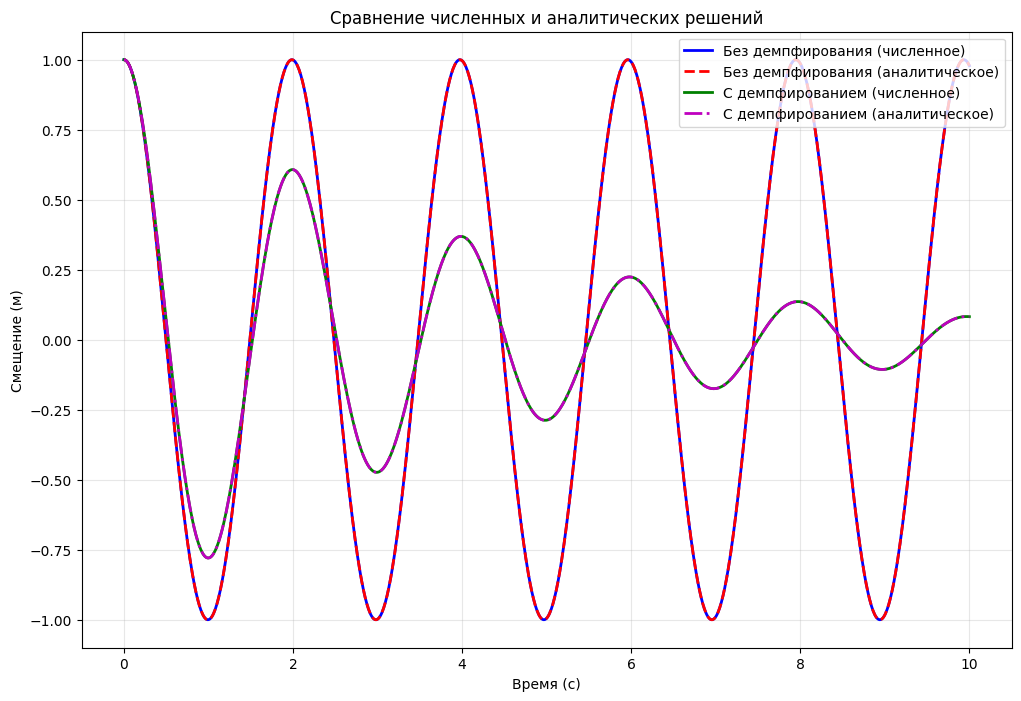

Макс. смещение (м)  Период (с)  \
0      Без демпфирования (численное)                 1.0    1.986918   
1  Без демпфирования (аналитическое)                 1.0    1.986918   
2       С демпфированием (численное)                 1.0    1.993156   
3   С демпфированием (аналитическое)                 1.0    1.993156   

   Амплитуда (м)  
0            1.0  
1            1.0  
2            1.0  
3            1.0

In [ ]:
# Визуализация и сравнение результатов
plt.figure(figsize=(12, 8))
plt.plot(t_eval, x_num_undamped, 'b-', linewidth=2, label='Без демпфирования (численное)')
plt.plot(t_eval, x_analytical_undamped, 'r--', linewidth=2, label='Без демпфирования (аналитическое)')
plt.plot(t_eval, x_num_damped, 'g-', linewidth=2, label='С демпфированием (численное)')
plt.plot(t_eval, x_analytical_damped, 'm-.', linewidth=2, label='С демпфированием (аналитическое)')
plt.xlabel('Время (с)')
plt.ylabel('Смещение (м)')
plt.title('Сравнение численных и аналитических решений')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Создание таблицы результатов
results = pd.DataFrame({
    '': ['Без демпфирования (численное)', 'Без демпфирования (аналитическое)', 
         'С демпфированием (численное)', 'С демпфированием (аналитическое)'],
    'Макс. смещение (м)': [
        np.max(np.abs(x_num_undamped)),
        np.max(np.abs(x_analytical_undamped)),
        np.max(np.abs(x_num_damped)),
        np.max(np.abs(x_analytical_damped))
    ],
    'Период (с)': [
        2 * np.pi / omega_n,
        2 * np.pi / omega_n,
        2 * np.pi / omega_d,
        2 * np.pi / omega_d
    ],
    'Амплитуда (м)': [
        np.max(np.abs(x_num_undamped)),
        np.max(np.abs(x_analytical_undamped)),
        np.max(np.abs(x_num_damped)),
        np.max(np.abs(x_analytical_damped))
    ]
})

results

